In [234]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import json
import glob
import os
from ast import literal_eval
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [235]:
import git
git = git.Git("../../../sonarqube/") 

In [236]:
szz_folder = "../../szz"
csv_folder = "../../csv"

### Import issues

In [237]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Import fixversions

In [238]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import versions

In [239]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head(5)

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import tags

In [240]:
tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags

,Tag,Sha,Date,Tag_number,month,year
0,latest-silver-master-#65,639ab0ae52d143cf8b8b82c009c95e69ed2d40d7,2015-01-30 10:12:28,latest-silver-master-#65,1,2015
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
...,...,...,...,...,...,...
181,2.10,43f27118331e8395365562c3859986489e38fb0a,2011-08-18 10:56:47,2.10,8,2011
182,2.9,d0d00d0874464b462e07dca0755ad662538395f2,2011-07-17 20:34:06,2.9,7,2011
183,2.8,9b97642bcdbf8060544ab96396da3600dc701e19,2011-05-18 18:30:23,2.8,5,2011
184,2.7,a823384d188516cb00088b6dd7d4ca66a21f5c77,2011-03-31 17:17:07,2.7,3,2011


## Szz Unleashed - Bug issues with no Affected Version
* python3 fetch_jira_bugs/fetch.py --issue-code SONAR --jira-project jira.sonarsource.com
* python3 fetch_jira_bugs/git_log_to_array.py --repo-path ../sonarqube --from-commit b326bfd875b0b41
* python3 fetch_jira_bugs/find_bug_fixes.py --gitlog gitlog.json --issue-list issue/ --gitlog-pattern "SONAR-{nbr}"
* java -jar build/libs/szz_find_bug_introducers-0.1.jar -i ../issue_list.json -r ../../sonarqube/

In [241]:
working_folder = "szz_unleashed_1"

In [242]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/*.json")

### Bug fixing commits

In [243]:
data = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data.update(json.load(f))

In [244]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [245]:
tuples = []
for key in data.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-13766,2020-08-17 15:43:29 +0200,2020-08-25 16:12:26 +0200,2020-08-17 16:10:03 -0500,60c64b2c9f95bb52d070758fa88a3881ae69b5e7
1,SONAR-12677,2019-11-05 12:25:52 +0100,2019-11-12 15:15:54 +0100,2019-11-06 17:01:34 +0100,8c0b3350b714e835e91d89f958eefa531533070a
2,SONAR-11103,2018-08-02 17:41:21 +0200,2019-01-11 10:26:34 +0100,2019-01-10 15:13:33 +0100,27249ed2abb99bc945cc8b0917f33b50ae96f786
3,SONAR-11467,2018-11-09 15:02:37 +0100,2018-12-05 09:12:34 +0100,2018-12-04 15:30:20 +0100,a08697f54c9f0b98c1a811c22135b9ae303df05e
4,SONAR-11225,2018-09-04 11:19:01 +0200,2019-01-10 17:10:55 +0100,2019-01-10 15:54:51 +0100,355a3b65066e968e3669a97892df81ef15770a55
...,...,...,...,...,...
426,SONAR-6877,2015-09-29 09:06:17 +0200,2015-11-09 10:25:36 +0100,2015-09-29 14:01:50 +0200,e314496d2198c3d827dd7baa7ec1c8fe5a4f6fb1
427,SONAR-12092,2019-05-07 15:08:07 +0200,2019-06-24 14:14:55 +0200,2019-06-21 15:44:00 +0200,36a2571ece01e51f104523ed98f43e6f27f03f75
428,SONAR-6873,2015-09-29 07:34:57 +0200,2015-10-02 13:04:36 +0200,2015-09-28 17:27:35 +0200,3f40e0bcabc43f283e69782dd1b30d7203841188
429,SONAR-11914,2019-04-02 21:07:31 +0200,2020-06-19 16:41:06 +0200,2020-06-19 10:47:02 +0200,b3840f39050b6a805c321748c84726038ccb3f6a


### Bug inducing commits

In [246]:
szz_inducing_folders = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/szz_unleashed_1/results/*")))
szz_inducing_files = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/szz_unleashed_1/results/*")))

In [247]:
szz_inducing_files

['../../szz/szz_unleashed_1/results/fix_and_introducers_pairs.json']

In [248]:
fix_and_introducers_pairs = {}

for file in szz_inducing_files:
    with open(file, "r") as f:
        fix_and_introducers_pairs.update(json.load(f))

for folder in szz_inducing_folders:
    with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
        fix_and_introducers_pairs.update(json.load(f))

In [249]:
fix_and_introducers_pairs_tuples = []
for key in fix_and_introducers_pairs.keys():
    fix_and_introducers_pairs_tuples.append((key, fix_and_introducers_pairs[key]))
fix_and_introducers = pd.DataFrame(fix_and_introducers_pairs_tuples, columns=["fixing_commit", "inducing_commit"])

In [250]:
len(set(issues_fixing_commit.hash).intersection(set(fix_and_introducers.fixing_commit)))

373

In [251]:
fix_and_introducers

,fixing_commit,inducing_commit
0,4e162555b40c43254f5b4e76470763bd6e706367,bc9b9edb7c887a74c47c59d615c48ae7024ab392
1,d6393623490fb38fa14c7e3a4a72bbcdbc47b835,1fd5d8abd320428e1e8e4cd1b3ebf793678b10f2
2,18f20eed6127994e54d2fcc7f9772fdcafcfd25d,f6df5fd53b68e63731fdec370778f827cddd6a7b
3,3383b0f376ddbfc348ecedc6fefc72adba929286,d82358c63d0fb979fb3cc27429a42ec833dc161a
4,63a3a432ef8a6127aa690b2bda2abab3c0ff82a5,6c37e7a9c7ef1b048c2067250235e24b386f4fc9
...,...,...
373,cfabfcbc0c4dc65000a2d1aca4212f7b1e720889,fede6d0a2378ce959e7cb1afdf221a92e22b8a6f
374,37915e1548b5a706b0aed606ee3250e3496850b0,e606937326a6f2c9d83d7d2509d73bb237a94356
375,1d2eb3b5ac8a23c5c4aa1b1ede5ce3f24840ce8a,abac7619c39e0e24aa86bb1150ce00b4063fa241
376,73e1d5bb27a020277499fe0be5d059184c59c233,6c37e7a9c7ef1b048c2067250235e24b386f4fc9


In [252]:
{"4e162555b40c43254f5b4e76470763bd6e706367": "87d444ab3bf860db5d39843d689ff9d330c18384"}

{'4e162555b40c43254f5b4e76470763bd6e706367': '87d444ab3bf860db5d39843d689ff9d330c18384'}

In [253]:
def find_first_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    if len(tags) > 0:
        return tags[0]
    return None

def all_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    return tags

fix_and_introducers["fixing_tag"] = fix_and_introducers.fixing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))
fix_and_introducers["inducing_tag"] = fix_and_introducers.inducing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))

### Run from here to avoid recreation of DataFrames

In [254]:
#fix_and_introducers.to_csv(f"{csv_folder}/fix_and_introducers_no_affected.csv")
fix_and_introducers = pd.read_csv(f"{csv_folder}/fix_and_introducers_no_affected.csv", index_col=0)
fix_and_introducers

,fixing_commit,inducing_commit,fixing_tag,inducing_tag
0,4e162555b40c43254f5b4e76470763bd6e706367,bc9b9edb7c887a74c47c59d615c48ae7024ab392,5.6,5.6
1,d6393623490fb38fa14c7e3a4a72bbcdbc47b835,1fd5d8abd320428e1e8e4cd1b3ebf793678b10f2,6.3,3.6
2,18f20eed6127994e54d2fcc7f9772fdcafcfd25d,f6df5fd53b68e63731fdec370778f827cddd6a7b,7.8,7.8
3,3383b0f376ddbfc348ecedc6fefc72adba929286,d82358c63d0fb979fb3cc27429a42ec833dc161a,6.2,6.0
4,63a3a432ef8a6127aa690b2bda2abab3c0ff82a5,6c37e7a9c7ef1b048c2067250235e24b386f4fc9,7.8,7.8
...,...,...,...,...
373,cfabfcbc0c4dc65000a2d1aca4212f7b1e720889,fede6d0a2378ce959e7cb1afdf221a92e22b8a6f,8.2.0.32929,7.5
374,37915e1548b5a706b0aed606ee3250e3496850b0,e606937326a6f2c9d83d7d2509d73bb237a94356,6.7,6.3
375,1d2eb3b5ac8a23c5c4aa1b1ede5ce3f24840ce8a,abac7619c39e0e24aa86bb1150ce00b4063fa241,7.5,7.5
376,73e1d5bb27a020277499fe0be5d059184c59c233,6c37e7a9c7ef1b048c2067250235e24b386f4fc9,7.9,7.8


In [255]:
fix_and_introducers.isna().sum()

fixing_commit      0
inducing_commit    0
fixing_tag         0
inducing_tag       0
dtype: int64

We were able to find a first tag containing the commit for both inducing and fixing commits

#### Do fixing bugs and inducing bug appear in the same tag for the first time?
This could explain why they were not tagged with any affected versions on Jira

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

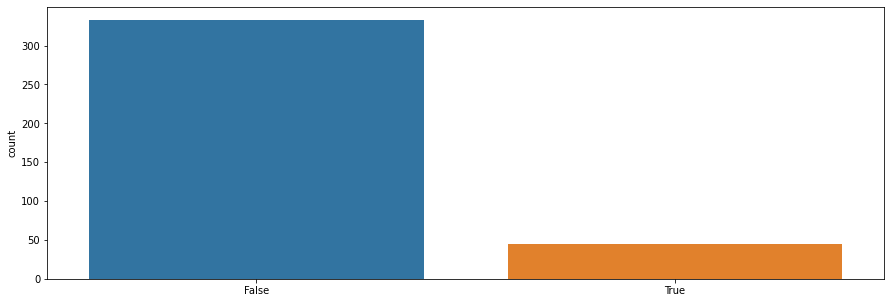

In [256]:
sns.countplot(fix_and_introducers.fixing_tag == fix_and_introducers.inducing_tag)

### Merging all datasets

In [257]:
fixversions = fixversions.merge(issues[["issue_key", "issue_id"]])

In [258]:
merge = fixversions.merge(issues_fixing_commit, left_on="issue_key", right_on="issue_name")
merge = merge.merge(fix_and_introducers, left_on="hash", right_on="fixing_commit")
merge

,issue_id,fixVersion_name,fixVersion_id,issue_key,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,inducing_commit,fixing_tag,inducing_tag
0,97360,8.5,16342,SONAR-13857,SONAR-13857,2020-09-08 09:52:57 +0200,2020-09-18 11:41:58 +0200,2020-09-15 10:12:47 +0200,36b911c2beb62d63067f6c8a0d255ff42182ea9f,36b911c2beb62d63067f6c8a0d255ff42182ea9f,ec64094599252553e55efa348516ff36477bce57,8.5.0.37579,8.2.0.32929
1,97230,8.5,16342,SONAR-13847,SONAR-13847,2020-09-02 17:59:37 +0200,2020-09-04 15:22:54 +0200,2020-09-03 14:50:59 +0200,88e87020615f59ceed877b2fce817689613dcd5d,88e87020615f59ceed877b2fce817689613dcd5d,35cb9ce02600f030954805ca506acf61da6625cc,8.5.0.37579,7.5
2,97061,8.5,16342,SONAR-13826,SONAR-13826,2020-08-27 17:49:37 +0200,2020-08-28 14:04:45 +0200,2020-08-27 17:55:21 +0200,c86168a157877c3176c7b536e3b94b9d792f3def,c86168a157877c3176c7b536e3b94b9d792f3def,aa1c78266501b7ae53a6d553182f816aab28c362,8.5.0.37579,8.1.0.31237
3,96808,8.5,16342,SONAR-13782,SONAR-13782,2020-08-19 15:55:16 +0200,2020-09-22 17:20:49 +0200,2020-09-15 11:07:07 -0500,d6164e9a32c80240cb36bab6812121c1bfd3b539,d6164e9a32c80240cb36bab6812121c1bfd3b539,46b893b80e4545da2a68b2f38c5a5081994f060c,8.5.0.37579,6.4
4,96744,8.5,16342,SONAR-13766,SONAR-13766,2020-08-17 15:43:29 +0200,2020-08-25 16:12:26 +0200,2020-08-17 16:10:03 -0500,60c64b2c9f95bb52d070758fa88a3881ae69b5e7,60c64b2c9f95bb52d070758fa88a3881ae69b5e7,c310acf604a82a9cc6c9d9af6afe2d22271be2cb,8.5.0.37579,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,29952,5.2,11629,SONAR-6525,SONAR-6525,2015-05-05 04:23:00 +0200,2015-05-05 05:09:07 +0200,2015-05-05 11:35:56 +0200,9b235dda465394be414f0e7e52094b930ccad175,9b235dda465394be414f0e7e52094b930ccad175,632c88629c99be66b63e04d8c5498c3d2ef23cf6,5.2,2.10
426,29889,5.2,11629,SONAR-6460,SONAR-6460,2015-04-22 11:29:58 +0200,2015-09-07 15:34:39 +0200,2015-09-07 14:21:50 +0200,4546b5560c8786816eceb7ded11254a5518f49fa,4546b5560c8786816eceb7ded11254a5518f49fa,5a6746e93985fd04c2667186b6826a320456a9ae,5.2,4.2
427,29856,5.2,11629,SONAR-6437,SONAR-6437,2015-04-17 08:08:33 +0200,2015-04-21 07:41:02 +0200,2015-04-21 14:33:02 +0200,4d65efdeffdfdedc71f9a038cf853b92b0ffe80e,4d65efdeffdfdedc71f9a038cf853b92b0ffe80e,09cd04981a52c1ba35d7d59dfa1d86db73544bca,5.2,4.4
428,27726,5.2,11629,SONAR-6347,SONAR-6347,2015-03-27 03:55:20 +0100,2015-09-25 11:54:07 +0200,2015-09-18 15:55:38 +0200,86b158854981eefac8955ece83e7b3d9761583ba,86b158854981eefac8955ece83e7b3d9761583ba,b593f8da030066b3690baa233fce833b87deffac,5.2,3.6


**How many fixVersion does an issue have?**

In [259]:
merge.groupby("issue_id").fixVersion_id.count().value_counts()

1    306
2     62
Name: fixVersion_id, dtype: int64

In [260]:
merge.groupby("issue_id").fixVersion_id.count().value_counts(normalize=True)

1    0.831522
2    0.168478
Name: fixVersion_id, dtype: float64

In [261]:
issue_ids_with_more_fixversions = merge.groupby("issue_id").fixVersion_id.count()[(merge.groupby("issue_id").fixVersion_id.count() > 1)].index

In [262]:
def find_max_version(versions):
    return versions.max()

In [263]:
ignore_indexes = []
for issue in issue_ids_with_more_fixversions:
    x = merge[merge.issue_id == issue]
    maxversion = find_max_version(x.fixVersion_name)
    for i, row in x.iterrows():
        if row.fixVersion_name != maxversion:
            ignore_indexes.append(i)

In [264]:
merge_with_one_ver = merge[~merge.index.isin(ignore_indexes)]
merge_with_one_ver

,issue_id,fixVersion_name,fixVersion_id,issue_key,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,inducing_commit,fixing_tag,inducing_tag
0,97360,8.5,16342,SONAR-13857,SONAR-13857,2020-09-08 09:52:57 +0200,2020-09-18 11:41:58 +0200,2020-09-15 10:12:47 +0200,36b911c2beb62d63067f6c8a0d255ff42182ea9f,36b911c2beb62d63067f6c8a0d255ff42182ea9f,ec64094599252553e55efa348516ff36477bce57,8.5.0.37579,8.2.0.32929
1,97230,8.5,16342,SONAR-13847,SONAR-13847,2020-09-02 17:59:37 +0200,2020-09-04 15:22:54 +0200,2020-09-03 14:50:59 +0200,88e87020615f59ceed877b2fce817689613dcd5d,88e87020615f59ceed877b2fce817689613dcd5d,35cb9ce02600f030954805ca506acf61da6625cc,8.5.0.37579,7.5
2,97061,8.5,16342,SONAR-13826,SONAR-13826,2020-08-27 17:49:37 +0200,2020-08-28 14:04:45 +0200,2020-08-27 17:55:21 +0200,c86168a157877c3176c7b536e3b94b9d792f3def,c86168a157877c3176c7b536e3b94b9d792f3def,aa1c78266501b7ae53a6d553182f816aab28c362,8.5.0.37579,8.1.0.31237
3,96808,8.5,16342,SONAR-13782,SONAR-13782,2020-08-19 15:55:16 +0200,2020-09-22 17:20:49 +0200,2020-09-15 11:07:07 -0500,d6164e9a32c80240cb36bab6812121c1bfd3b539,d6164e9a32c80240cb36bab6812121c1bfd3b539,46b893b80e4545da2a68b2f38c5a5081994f060c,8.5.0.37579,6.4
4,96744,8.5,16342,SONAR-13766,SONAR-13766,2020-08-17 15:43:29 +0200,2020-08-25 16:12:26 +0200,2020-08-17 16:10:03 -0500,60c64b2c9f95bb52d070758fa88a3881ae69b5e7,60c64b2c9f95bb52d070758fa88a3881ae69b5e7,c310acf604a82a9cc6c9d9af6afe2d22271be2cb,8.5.0.37579,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,29952,5.2,11629,SONAR-6525,SONAR-6525,2015-05-05 04:23:00 +0200,2015-05-05 05:09:07 +0200,2015-05-05 11:35:56 +0200,9b235dda465394be414f0e7e52094b930ccad175,9b235dda465394be414f0e7e52094b930ccad175,632c88629c99be66b63e04d8c5498c3d2ef23cf6,5.2,2.10
426,29889,5.2,11629,SONAR-6460,SONAR-6460,2015-04-22 11:29:58 +0200,2015-09-07 15:34:39 +0200,2015-09-07 14:21:50 +0200,4546b5560c8786816eceb7ded11254a5518f49fa,4546b5560c8786816eceb7ded11254a5518f49fa,5a6746e93985fd04c2667186b6826a320456a9ae,5.2,4.2
427,29856,5.2,11629,SONAR-6437,SONAR-6437,2015-04-17 08:08:33 +0200,2015-04-21 07:41:02 +0200,2015-04-21 14:33:02 +0200,4d65efdeffdfdedc71f9a038cf853b92b0ffe80e,4d65efdeffdfdedc71f9a038cf853b92b0ffe80e,09cd04981a52c1ba35d7d59dfa1d86db73544bca,5.2,4.4
428,27726,5.2,11629,SONAR-6347,SONAR-6347,2015-03-27 03:55:20 +0100,2015-09-25 11:54:07 +0200,2015-09-18 15:55:38 +0200,86b158854981eefac8955ece83e7b3d9761583ba,86b158854981eefac8955ece83e7b3d9761583ba,b593f8da030066b3690baa233fce833b87deffac,5.2,3.6


**Validating the bug fixing version found by the algorithm**m

In [265]:
merge_with_one_ver.apply(lambda x: x.fixing_tag.startswith(x.fixVersion_name), axis=1).value_counts(normalize=True)

True     0.777174
False    0.222826
dtype: float64

In [266]:
merge_with_one_ver.apply(lambda x: x.fixing_tag.startswith(x.fixVersion_name), axis=1).value_counts()

True     286
False     82
dtype: int64

**Issues with fixVersion not matching the one found with SZZ algorithm**

In [267]:
not_matching_tags = merge_with_one_ver[merge_with_one_ver.apply(lambda x: not x.fixing_tag.startswith(x.fixVersion_name), axis=1)].fixVersion_name.unique()
not_matching_tags

array(['7.9.1', '7.8', '7.4', '7.3', '7.2', '7.1', '7.0', '6.6-M3',
       '6.6-M1', '6.5-M2', '6.5-M1', '6.2', '6.4'], dtype=object)

In [268]:
tags_not_on_github = set(not_matching_tags) - set(tags.Tag.unique())
tags_not_on_github

{'6.6-M1', '6.6-M3', '7.1', '7.2', '7.3', '7.4'}

In [269]:
wrong_fixversion = merge_with_one_ver[merge_with_one_ver.apply(lambda x: not x.fixing_tag.startswith(x.fixVersion_name), axis=1)]
wrong_fixversion

,issue_id,fixVersion_name,fixVersion_id,issue_key,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,inducing_commit,fixing_tag,inducing_tag
103,86318,7.9.1,15029,SONAR-12274,SONAR-12274,2019-07-09 13:27:19 +0200,2019-07-09 16:14:37 +0200,2019-07-09 14:40:07 +0200,68cc9d45565f01dfe68c03d133cbc6591be0a544,68cc9d45565f01dfe68c03d133cbc6591be0a544,287ba427ea59dcafa5784ea0f2dcb06704abc23f,8.0,7.8
118,84807,7.8,14939,SONAR-12127,SONAR-12127,2019-05-21 11:24:57 +0200,2019-05-27 09:00:18 +0200,2019-06-26 15:57:04 +0200,d3f1775ff556addcd4b666cf971aa9da2a176795,d3f1775ff556addcd4b666cf971aa9da2a176795,9824b94f16109305b4847a611379029695823427,7.9,6.4
175,77428,7.4,14549,SONAR-11314,SONAR-11314,2018-10-03 12:16:49 +0200,2018-10-11 10:45:35 +0200,2018-10-10 16:43:13 +0200,4b9c8ad09c0dbf6b148f0de8d9062716755e1d28,4b9c8ad09c0dbf6b148f0de8d9062716755e1d28,55822b5c264747a28161902119482ef7f000ab66,7.5,7.5
176,77383,7.4,14549,SONAR-11311,SONAR-11311,2018-10-02 14:19:48 +0200,2018-10-11 10:45:06 +0200,2018-10-10 10:08:44 +0200,d234df518982af0f6194b457929786b06b7e32fe,d234df518982af0f6194b457929786b06b7e32fe,477cfbd296c49853604563e24fc2c9987b4f751e,7.5,7.5
177,76922,7.4,14549,SONAR-11303,SONAR-11303,2018-09-21 21:08:01 +0200,2018-10-11 10:45:32 +0200,2018-10-10 16:20:50 +0200,1da2b46a8136637073020efa4f171b2ee8693191,1da2b46a8136637073020efa4f171b2ee8693191,7d7bfd09c1bdbe753899265ef15212b0e4682c32,7.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,59040,6.6-M1,14014,SONAR-8973,SONAR-8973,2017-03-17 17:02:03 +0100,2017-07-28 17:05:42 +0200,2017-06-30 17:42:45 +0200,422912b59e4ffd99d05f45eae4b9289f2e7f6646,422912b59e4ffd99d05f45eae4b9289f2e7f6646,b7658ecbacb8d3373ae0b354620e96e31bcd3e56,6.6,5.2
326,56846,6.6-M1,14014,SONAR-8689,SONAR-8689,2017-01-23 10:17:26 +0100,2017-08-17 15:23:17 +0200,2017-08-15 11:35:08 +0200,8bc4086d095f80bef3946f493357f70cf093c0c7,8bc4086d095f80bef3946f493357f70cf093c0c7,d2da7f30d512284c943b82abc135483b59b85536,6.6,6.1
332,56188,6.6-M1,14014,SONAR-8591,SONAR-8591,2017-01-05 16:47:58 +0100,2017-08-09 13:25:00 +0200,2017-08-08 11:42:50 +0200,60dc681dbf066bf2afa19992c678a132bdc19d54,60dc681dbf066bf2afa19992c678a132bdc19d54,c4527541d9466b021a653b1148aee74d0912f09a,6.6,5.2
342,54856,6.2,13327,SONAR-8436,SONAR-8436,2016-11-25 10:53:06 +0100,2016-12-01 14:00:30 +0100,2016-11-30 14:04:12 +0100,a66fbbffe4a12a21014ba08aa80edd31a0a6e5d9,a66fbbffe4a12a21014ba08aa80edd31a0a6e5d9,7c462864a6280697456a21cbb619dc8359e1c39d,5.6.4,5.5


**Wrong version due to Milestones and Release Candidates (fix the way we pick the maximum version would solve this)**

In [270]:
w1 = wrong_fixversion[wrong_fixversion.apply(lambda x: x.fixing_tag in (x.fixVersion_name), axis=1)]
w1.shape

(26, 13)

In [271]:
w2 = wrong_fixversion[wrong_fixversion.fixVersion_name.isin(tags_not_on_github)]
w2.shape

(69, 13)

**Wrong versions left for inspection after removing the known mistakes/right mappings**

In [272]:
wrong_fixversion[~wrong_fixversion.index.isin(list(w1.index) + list(w2.index))]

,issue_id,fixVersion_name,fixVersion_id,issue_key,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,inducing_commit,fixing_tag,inducing_tag
103,86318,7.9.1,15029,SONAR-12274,SONAR-12274,2019-07-09 13:27:19 +0200,2019-07-09 16:14:37 +0200,2019-07-09 14:40:07 +0200,68cc9d45565f01dfe68c03d133cbc6591be0a544,68cc9d45565f01dfe68c03d133cbc6591be0a544,287ba427ea59dcafa5784ea0f2dcb06704abc23f,8.0,7.8
118,84807,7.8,14939,SONAR-12127,SONAR-12127,2019-05-21 11:24:57 +0200,2019-05-27 09:00:18 +0200,2019-06-26 15:57:04 +0200,d3f1775ff556addcd4b666cf971aa9da2a176795,d3f1775ff556addcd4b666cf971aa9da2a176795,9824b94f16109305b4847a611379029695823427,7.9,6.4
227,68310,7.0,14041,SONAR-10297,SONAR-10297,2018-01-11 15:45:23 +0100,2018-01-23 09:35:51 +0100,2018-01-17 17:57:08 +0100,b2ca3f63d2a6ab89aba6041f133ed6067b8f81e5,b2ca3f63d2a6ab89aba6041f133ed6067b8f81e5,a5fb1f9e0ce662aa7f8a8d6e79645dc9438cee82,6.7.2,6.4
231,67810,7.0,14041,SONAR-10216,SONAR-10216,2017-12-20 10:14:15 +0100,2017-12-20 11:42:09 +0100,2017-12-20 10:25:11 +0100,097994df9b06457852baa0eec5313f363eed9cd7,097994df9b06457852baa0eec5313f363eed9cd7,fa9ba212e1b5da761a0a520a887977211fe6a332,6.7.1,6.6
235,67600,7.8,14939,SONAR-10199,SONAR-10199,2017-12-13 09:39:18 +0100,2019-01-31 13:43:28 +0100,2019-01-22 13:00:53 +0100,1361ba5fb9d1bf5f98cba5feff9227f177a44e94,1361ba5fb9d1bf5f98cba5feff9227f177a44e94,2ce306a42f031d75c4ec4f12a69e2bc580f4a1d5,7.7,6.3
342,54856,6.2,13327,SONAR-8436,SONAR-8436,2016-11-25 10:53:06 +0100,2016-12-01 14:00:30 +0100,2016-11-30 14:04:12 +0100,a66fbbffe4a12a21014ba08aa80edd31a0a6e5d9,a66fbbffe4a12a21014ba08aa80edd31a0a6e5d9,7c462864a6280697456a21cbb619dc8359e1c39d,5.6.4,5.5
365,49751,6.4,13697,SONAR-7752,SONAR-7752,2016-06-13 09:37:20 +0200,2017-02-20 16:48:54 +0100,2016-06-13 09:42:55 +0200,47d02a5e043b7a97c420bc47dfadb9d4b4b3c6eb,47d02a5e043b7a97c420bc47dfadb9d4b4b3c6eb,d6a835473c21084e3864da7f854e5000a4867843,5.6.1,5.5


* Only 7 issues are left for manual inspection, as the other do match the one on Jira

***Commits for issues have been retrieved with the command git log --all --grep='SONAR-{issue_id}'***
* 86318 has 2 identical commits referring to this issue. One on branch 7.9 (which did not make it into any tags) and 1 on master which is contained in many tags, starting from version 8.0 on. The mapping from the algorithm seems to be right.
* 84807 has 3 commits. The oldest one is indeed in version 7.8 but the other two are in 7.9 and foward versions.  The algorithm seems to be right. However, it is not clear from the issue description how the last two commits relate to that. It is clear how the first commit (which date matched the resolution date on Jira) solves it.
* 68310, 67810 The version matches with the earliest one on Jira, we used the latest one. This confirms that both are right. Probably a fix for a bug in the old version 6 (therefore fixversion 6.7.1)and included in the major version 7.0 as well.
* 67600, 54856, 49751. Only one commit solving it. It is both in the one on Jira and one from SZZ (which is previous). The algorithm is right

### Investigating issues for which no bug-fixing commit was found

Load the originally downloaded issues by SZZ

In [273]:
issues_files = glob.glob(f"{szz_folder}/{working_folder}/issues/*")

In [274]:
data = {}
for issues_file in issues_files:
    with open(issues_file, "r") as f:
        data.update(json.load(f))

In [275]:
tuples = []
for issue in data["issues"]:
    print(issue)
    tuples.append((issue["id"], issue["key"]))
starting_issues = pd.DataFrame(tuples, columns=["issue_id", "issue_name"])
starting_issues

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,issue_id,issue_name
0,98244,SONAR-13966
1,98107,SONAR-13940
2,97392,SONAR-13866
3,97360,SONAR-13857
4,97230,SONAR-13847
...,...,...
484,29752,SONAR-6396
485,29690,SONAR-6369
486,29708,SONAR-6356
487,27726,SONAR-6347


In [276]:
issues_no_fixing_bug = starting_issues[~starting_issues.issue_name.isin(issues_fixing_commit.issue_name)]
issues_no_fixing_bug.loc[:,("issue_id")] = pd.to_numeric(issues_no_fixing_bug.issue_id)
len(issues_no_fixing_bug)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


58

In [277]:
issues_no_fixing_bug = issues_no_fixing_bug.merge(issues, on="issue_id")
issues_no_fixing_bug

,issue_id,issue_name,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,97392,SONAR-13866,SONAR-13866,Bug,P3-Medium,0|i0dhfz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-15 12:37:57+00:00,-1,NaT,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,[<JIRA Component: name='Portfolio & Applicatio...,NaN,NaN,NaN,NaN,NaN,When using {{api/views/add_sub_view}} with a d...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,It should not be possible to use a description...,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1.0,Fixed,0
1,97063,SONAR-13827,SONAR-13827,Bug,P3-Medium,0|i0dff3:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-08-28 14:35:24+00:00,-1,NaT,<JIRA Watchers at 5063526624>,2020-08-27 17:28:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53242'>],Duarte Meneses,2020-08-28 14:35:24+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,Due to a mistake implementing the new SCM API ...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,"New Code Period set to ""reference branch"" is n...",Duarte Meneses,[],NaN,NaN,Duarte Meneses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-03 00:00:00+00:00,0,1,Bug,3,Major,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,6,Closed,1.0,Fixed,0
2,95454,SONAR-13553,SONAR-13553,Bug,P3-Medium,0|i0d5of:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.4', id='15833'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-06-29 07:46:01+00:00,-1,NaT,<JIRA Watchers at 5072282192>,2020-06-19 09:51:46+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['issues'],None,NaN,NaN,NaN,NaN,NaN,[],[],Wouter Admiraal

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edition', ylabel='count'>

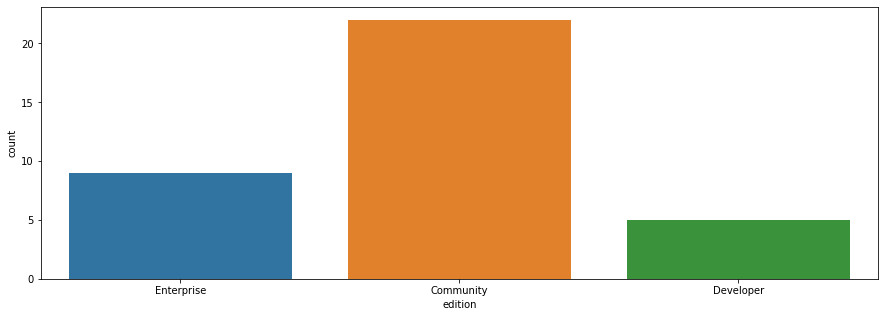

In [278]:
sns.countplot(issues_no_fixing_bug.edition)

for issue_id in issues_no_fixing_bug.issue_name:
    res = git.log("--all", f"--grep='SONAR-{issue_id}'")
    if res != "":
        print(res)

* We confirmed that the issues for which no bug fixing commit was found do not have a commit referencing them using the issue name. They must have been closed manually

## Szz Unleashed - Bug issues with Affected Version

### Import of the data

In [279]:
working_folder = "szz_unleashed_with_affected"

In [280]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/fix_and_introducers_pairs_*")
szz_files

['../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_4.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_5.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_2.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_3.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_0.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_1.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_6.json',
 '../../szz/szz_unleashed_with_affected/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [281]:
data2 = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data2.update(json.load(f))

In [282]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [283]:
tuples = []
for key in data2.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data2[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit_with_affected = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit_with_affected.creationdate = pd.to_datetime(issues_fixing_commit_with_affected.creationdate)
issues_fixing_commit_with_affected

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-7084,2015-11-26 16:37:15+01:00,2016-05-17 16:42:24 +0200,2015-11-30 16:51:26 +0100,f463897daea037addd0ee5d1a45c046b784e1fc5
1,SONAR-7083,2015-11-26 15:22:13+01:00,2015-11-30 14:01:03 +0100,2015-11-30 11:48:51 +0100,06310fbb1aff7750fa55a4eebd6fc8eada97f95a
2,SONAR-9782,2017-09-01 17:05:07+02:00,2017-10-17 11:33:22 +0200,2017-10-16 10:33:00 +0200,87f55940473777bd4080595a8369a7cf958745c4
3,SONAR-11468,2018-11-12 08:43:21+01:00,2018-12-04 16:05:26 +0100,2018-12-04 16:04:32 +0100,4ecd4bdcbc24f97a2d77aafb6273ce805976baaf
4,SONAR-10258,2018-01-08 16:51:50+01:00,2018-01-10 09:05:57 +0100,2018-01-08 17:52:43 +0100,0b8e4aad2693dbea56400bacd43fd8a4aec72389
...,...,...,...,...,...
500,SONAR-6715,2015-07-15 08:29:57+02:00,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
501,SONAR-6831,2015-09-03 12:09:33+02:00,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
502,SONAR-6995,2015-11-04 15:23:53+01:00,2015-12-04 11:30:34 +0100,2015-12-03 12:29:24 +0100,e5f5ca562f10727eead9e0de8fe1a090dea8399d
503,SONAR-6632,2015-06-09 21:51:26+02:00,2016-05-16 14:41:20 +0200,2016-05-16 12:12:25 +0200,23ee784e6d44f8462c8d160c7a113a64424bfb67


### Bug inducing commits

In [284]:
szz_inducing_folders2 = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))
szz_inducing_files2 = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))

In [285]:
fix_and_introducers_pairs_with_affected = {}

for file in szz_inducing_files2:
    with open(file, "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

for folder in szz_inducing_folders2:
    with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

In [286]:
fix_and_introducers_pairs_tuples_with_affected = []
for key in fix_and_introducers_pairs_with_affected.keys():
    fix_and_introducers_pairs_tuples_with_affected.append((key, fix_and_introducers_pairs_with_affected[key]))
fix_and_introducers_with_affected = pd.DataFrame(fix_and_introducers_pairs_tuples_with_affected, columns=["fixing_commit", "inducing_commit"])

In [287]:
fix_and_introducers_with_affected

,fixing_commit,inducing_commit
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c
...,...,...
457,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26
458,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58
459,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063
460,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2


fix_and_introducers_with_affected["fixing_tag"] = fix_and_introducers_with_affected.fixing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))
fix_and_introducers_with_affected["inducing_tag"] = fix_and_introducers_with_affected.inducing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))

#Calculating the tags in which only the inducing commits is persent AND not the fixing commits. These should be the affected versions
fix_and_introducers_with_affected["affected_tags_from_szz"] = fix_and_introducers_with_affected.apply(lambda x: list(set(all_tag_contains_commit(x.inducing_commit)) - set(all_tag_contains_commit(x.fixing_commit))), axis = 1)

**Avoid recreation**

In [288]:
#fix_and_introducers_with_affected.to_csv(f"{csv_folder}/fix_and_introducers_with_affected.csv")
fix_and_introducers_with_affected = pd.read_csv(f"{csv_folder}/fix_and_introducers_with_affected.csv", index_col=0)
fix_and_introducers_with_affected.affected_tags_from_szz = fix_and_introducers_with_affected.affected_tags_from_szz.apply(lambda x: literal_eval(x))
fix_and_introducers_with_affected

,fixing_commit,inducing_commit,fixing_tag,inducing_tag,affected_tags_from_szz
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,7.5,[]
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c,6.7,6.0,"[6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-RC1, 6.3...."
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.5.0.37579,8.4.0.35506,"[8.4.2.36762, 8.4.0.35506, 8.4.1.35646]"
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,7.5,6.1,"[7.0-RC1, 6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-..."
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.4.0.35506,8.2.0.32929,"[8.3.0.34182, 8.2.0.32929, 8.3.1.34397]"
...,...,...,...,...,...
457,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26,5.6.2,5.4,"[5.4-M1, 5.5-M14, 5.4, 5.5-M1, 5.4-RC1, 5.4-M1..."
458,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,7.5,[]
459,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063,5.2,5.0,"[5.0.1, 5.1, 5.1.2, 5.0-RC1, 5.0-RC4, 5.1-RC2,..."
460,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2,6.7,6.4,"[6.4-RC2, 6.4-RC3, 6.5-M2, 6.4, 6.5-M4, 6.5-M1..."


In [289]:
fix_and_introducers_with_affected.isna().sum()

fixing_commit             0
inducing_commit           0
fixing_tag                1
inducing_tag              0
affected_tags_from_szz    0
dtype: int64

### Analysis - Matching the oldest inducing_tag

In [290]:
merge = fix_and_introducers_with_affected.merge(issues_fixing_commit_with_affected, left_on="fixing_commit", right_on="hash")[["issue_name", "inducing_commit", "inducing_tag", "affected_tags_from_szz"]]
merge = merge.merge(issues, left_on="issue_name", right_on="issue_key")[["issue_id", "issue_name", "inducing_commit", "inducing_tag", "affected_tags_from_szz"]]
merge

,issue_id,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,[]
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,"[6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-RC1, 6.3...."
2,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,"[8.4.2.36762, 8.4.0.35506, 8.4.1.35646]"
3,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,"[7.0-RC1, 6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-..."
4,94773,SONAR-13460,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.2.0.32929,"[8.3.0.34182, 8.2.0.32929, 8.3.1.34397]"
...,...,...,...,...,...
450,40624,SONAR-6726,7534b360dac6e9e139bd148613fe6a9930dfffa4,4.5.1,"[5.1-RC2, 4.5.1, 4.5.6, 5.1.1, 5.0, 5.1-RC1, 5..."
451,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,"[5.4-M1, 5.5-M14, 5.4, 5.5-M1, 5.4-RC1, 5.4-M1..."
452,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,[]
453,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,"[5.0.1, 5.1, 5.1.2, 5.0-RC1, 5.0-RC4, 5.1-RC2,..."


In [291]:
merge2 = merge.merge(versions, on="issue_id")
merge2

,issue_id,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name,version_id
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,[],7.3,14464
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,"[6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-RC1, 6.3....",5.6.3,13420
2,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,"[6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-RC1, 6.3....",6.1,13287
3,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,"[8.4.2.36762, 8.4.0.35506, 8.4.1.35646]",8.4,15833
4,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,"[7.0-RC1, 6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-...",6.7,13972
...,...,...,...,...,...,...,...
556,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,"[5.4-M1, 5.5-M14, 5.4, 5.5-M1, 5.4-RC1, 5.4-M1...",5.6,12869
557,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,[],7.2,14213
558,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,"[5.0.1, 5.1, 5.1.2, 5.0-RC1, 5.0-RC4, 5.1-RC2,...",4.5.1,11621
559,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,"[5.0.1, 5.1, 5.1.2, 5.0-RC1, 5.0-RC4, 5.1-RC2,...",5.0,11625


### Issues with only one version

Issues from the SZZ analysis which only have 1 affecred version on Jira

In [292]:
x = versions.groupby(["issue_id"]).version_name.count()
issues_with_one_version = x[x < 2].index
one_version_issues = merge2[merge2.issue_id.isin(issues_with_one_version)]
len(one_version_issues)

375

In [293]:
one_version_issues

,issue_id,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name,version_id
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,[],7.3,14464
3,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,"[8.4.2.36762, 8.4.0.35506, 8.4.1.35646]",8.4,15833
4,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,"[7.0-RC1, 6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-...",6.7,13972
5,94773,SONAR-13460,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.2.0.32929,"[8.3.0.34182, 8.2.0.32929, 8.3.1.34397]",8.3.1,15930
6,62563,SONAR-9500,139261bbc13192621ef795d6d45298e1d8e1b7f3,6.4,"[6.4-RC2, 6.4-RC3, 6.5-M2, 6.4, 6.5-M4, 6.5-M1...",6.2,13327
...,...,...,...,...,...,...,...
554,65416,SONAR-9920,2b881f44742dbb0ff5b8f651f81ced85e2bebed1,5.4,"[5.4-M1, 5.5-M14, 5.4, 6.6, 6.2, 6.2-RC1, 5.5-...",6.6,13961
555,40624,SONAR-6726,7534b360dac6e9e139bd148613fe6a9930dfffa4,4.5.1,"[5.1-RC2, 4.5.1, 4.5.6, 5.1.1, 5.0, 5.1-RC1, 5...",4.5.2,11622
556,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,"[5.4-M1, 5.5-M14, 5.4, 5.5-M1, 5.4-RC1, 5.4-M1...",5.6,12869
557,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,[],7.2,14213


In [294]:
one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
one_version_issues["inducing_tag_modif"] = one_version_issues.inducing_tag.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])
one_version_issues["version_name_major"] = one_version_issues.version_name.apply(lambda v: v.split(".")[0])
one_version_issues["version_name_minor"] = one_version_issues.version_name.apply(lambda v: v.split(".")[1])
one_version_issues["version_name_modif"] = one_version_issues.version_name.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])

<ipython-input-294-20fc0d06af86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
<ipython-input-294-20fc0d06af86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
<ipython-input-294-20fc0d06af86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [295]:
one_version_issues

,issue_id,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name,version_id,inducing_tag_major,inducing_tag_minor,inducing_tag_modif,version_name_major,version_name_minor,version_name_modif
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,[],7.3,14464,7,5,None,7,3,None
3,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,"[8.4.2.36762, 8.4.0.35506, 8.4.1.35646]",8.4,15833,8,4,0,8,4,None
4,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,"[7.0-RC1, 6.6, 6.2, 6.2-RC1, 6.3.0.18800, 6.6-...",6.7,13972,6,1,None,6,7,None
5,94773,SONAR-13460,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.2.0.32929,"[8.3.0.34182, 8.2.0.32929, 8.3.1.34397]",8.3.1,15930,8,2,0,8,3,1
6,62563,SONAR-9500,139261bbc13192621ef795d6d45298e1d8e1b7f3,6.4,"[6.4-RC2, 6.4-RC3, 6.5-M2, 6.4, 6.5-M4, 6.5-M1...",6.2,13327,6,4,None,6,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,65416,SONAR-9920,2b881f44742dbb0ff5b8f651f81ced85e2bebed1,5.4,"[5.4-M1, 5.5-M14, 5.4, 6.6, 6.2, 6.2-RC1, 5.5-...",6.6,13961,5,4,None,6,6,None
555,40624,SONAR-6726,7534b360dac6e9e139bd148613fe6a9930dfffa4,4.5.1,"[5.1-RC2, 4.5.1, 4.5.6, 5.1.1, 5.0, 5.1-RC1, 5...",4.5.2,11622,4,5,1,4,5,2
556,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,"[5.4-M1, 5.5-M14, 5.4, 5.5-M1, 5.4-RC1, 5.4-M1...",5.6,12869,5,4,None,5,6,None
557,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,[],7.2,14213,7,5,None,7,2,None


**Full match**

In [296]:
len(one_version_issues[(one_version_issues.inducing_tag == one_version_issues.version_name).tolist()]) / len(one_version_issues)

0.232

**Partial match: both major and minor version**

In [297]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist() and \
                   (one_version_issues.inducing_tag_minor == one_version_issues.version_name_minor).tolist()]) / len(one_version_issues)

0.2906666666666667

**Partial match: only major version**

In [298]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist()]) / len(one_version_issues)

0.7493333333333333

**In tag affected list match**

In [322]:
one_version_issues.apply(lambda x: x.version_name in x.affected_tags_from_szz, axis=1).value_counts(normalize=True).sort_index()

False    0.357333
True     0.642667
dtype: float64

### Issues with more than 1 version

Create the dataframe with issues with multiple versions and create a list of versions per each issue. Remove duplicates

In [299]:
x_with_list = versions.groupby(["issue_id"]).version_name.apply(list)
x_with_list = x_with_list[x_with_list.index.isin(merge2.issue_id) & x_with_list.apply(lambda x: len(x) > 1)]

In [300]:
y = x_with_list.reset_index().merge(merge2, on="issue_id")
y = y.drop_duplicates(subset='issue_id', keep="last")
y

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,cdf4443c3769ea50c1dc127c10dfb905847568dc,3.6,"[3.6.2, 4.5-RC3, 3.7.2, 5.1-RC2, 4.4-RC1, 4.5....",5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,"[5.4-M1, 5.5-M10, 5.3-RC1, 5.4-M6, 5.2-RC1, 4....",5.1,11627
5,40452,"[5.1, 5.1.1]",SONAR-6715,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,"[5.1, 5.1-RC2, 5.1.1, latest-silver-master-#65...",5.1.1,11628
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,[],5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,"[4.5-RC3, 5.1-RC2, 4.4-RC1, 4.5.1, 4.5.6, 5.1....",5.1,11627
...,...,...,...,...,...,...,...,...
177,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,"[7.6, 7.0-RC1, 6.6, 6.6-RC1, 6.7.5, 6.7.6, 6.7...",7.9.1,15029
179,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,"[7.6, 7.0-RC1, 6.6, 6.6-RC1, 6.7.5, 6.7.6, 6.5...",7.9,14945
181,90155,"[7.9, 8.4]",SONAR-12692,3065f6824c72d504c8e317c7d2d6a2c682081c4f,7.5,"[7.8, 7.9.1, 7.6, 8.2.0.32929, 8.4.0.35506, 7....",8.4,15833
183,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,"[7.8, 7.9.1, 7.6, 7.9.4, 7.9, 7.7, 7.5, 7.9.2,...",8.0,14962


**How many issues contain the inducing tag from SZZ in their affected versions?**

In [301]:
len(y[y.apply(lambda x: x.inducing_tag in x.version_name_x, axis = 1)]) / len(y)

0.2

In [302]:
y[y.apply(lambda x: not x.inducing_tag in x.version_name_x, axis = 1)]

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,cdf4443c3769ea50c1dc127c10dfb905847568dc,3.6,"[3.6.2, 4.5-RC3, 3.7.2, 5.1-RC2, 4.4-RC1, 4.5....",5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,"[5.4-M1, 5.5-M10, 5.3-RC1, 5.4-M6, 5.2-RC1, 4....",5.1,11627
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,[],5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,"[4.5-RC3, 5.1-RC2, 4.4-RC1, 4.5.1, 4.5.6, 5.1....",5.1,11627
19,44279,"[4.5.6, 5.2, 5.3]",SONAR-7142,7cf57c2495bd16c2e7056c0ff47fc962a8ff432f,5.1,"[5.3-RC3, 5.1-RC2, 5.4-M1, 5.5-M14, 5.4, 5.1.1...",5.3,11647
...,...,...,...,...,...,...,...,...
177,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,"[7.6, 7.0-RC1, 6.6, 6.6-RC1, 6.7.5, 6.7.6, 6.7...",7.9.1,15029
179,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,"[7.6, 7.0-RC1, 6.6, 6.6-RC1, 6.7.5, 6.7.6, 6.5...",7.9,14945
181,90155,"[7.9, 8.4]",SONAR-12692,3065f6824c72d504c8e317c7d2d6a2c682081c4f,7.5,"[7.8, 7.9.1, 7.6, 8.2.0.32929, 8.4.0.35506, 7....",8.4,15833
183,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,"[7.8, 7.9.1, 7.6, 7.9.4, 7.9, 7.7, 7.5, 7.9.2,...",8.0,14962


### Analysis - Comparing the list of affected_tags AND the affectedVersions from Jira
We compare all the issues, both with one and with more versions

In [313]:
all_with_list = versions.groupby(["issue_id"]).version_name.apply(list)
all_with_list_merged = all_with_list.reset_index().merge(merge2, on="issue_id")
all_with_list_merged = all_with_list_merged.drop_duplicates(subset='issue_id', keep="last")
all_with_list_merged

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,affected_tags_from_szz,version_name_y,version_id
0,29665,[5.1],SONAR-6351,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,"[5.1, 5.1-RC2, 5.1.1, latest-silver-master-#65...",5.1,11627
1,29701,[5.0],SONAR-6335,8ed0d04c7dddd824b86f25cec4d6761f88078317,5.0,"[5.0.1, 5.0-RC1, 5.0-RC4, 5.1-RC2, 5.0-RC3, 5....",5.0,11625
3,29703,"[4.5.4, 5.0]",SONAR-6386,cdf4443c3769ea50c1dc127c10dfb905847568dc,3.6,"[3.6.2, 4.5-RC3, 3.7.2, 5.1-RC2, 4.4-RC1, 4.5....",5.0,11625
4,29731,[4.5.1],SONAR-6348,c152a8c09c6dc62a7cc102721c1a848a493fb68d,3.0,"[3.6.2, 4.5-RC3, 3.7.2, 5.1-RC2, 3.2.1, 3.5, 4...",4.5.1,11621
5,29793,[5.1],SONAR-6403,e8f492a694c6868128d84d4a75f56f4e8cac0224,5.1,"[5.1, 5.1.2, 5.1-RC2, 5.1.1, latest-silver-mas...",5.1,11627
...,...,...,...,...,...,...,...,...
556,96774,[8.4.1],SONAR-13773,17bbc381c796efc51326c96e77c0fe7294c6a010,7.8,"[7.8, 7.9.1, 8.4.2.36762, 8.2.0.32929, 8.4.0.3...",8.4.1,16358
557,96862,[8.4.1],SONAR-13786,1274e4f398ab05aceaedcaa9fd5453ca5b7732a3,8.2.0.32929,"[8.2.0.32929, 8.4.0.35506, 8.3.0.34182, 8.3.1....",8.4.1,16358
558,96887,[8.4.1],SONAR-13790,b501b1b4a27b26f4dbbca99995980edb6449c2c1,8.2.0.32929,"[8.2.0.32929, 8.4.0.35506, 8.3.0.34182, 8.3.1....",8.4.1,16358
559,96934,[8.4.1],SONAR-13802,d8081f847f92247a64166572605876e67e9a34ed,8.3.0.34182,"[8.4.0.35506, 8.3.0.34182, 8.3.1.34397, 8.4.2....",8.4.1,16358


In [314]:
all_with_list_merged.apply(lambda x: len(set(x.affected_tags_from_szz).intersection(x.version_name_x)) / len(x.version_name_x), axis=1).value_counts(normalize=True).sort_index()

0.000000    0.318681
0.333333    0.006593
0.500000    0.041758
0.666667    0.008791
0.888889    0.002198
1.000000    0.621978
dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


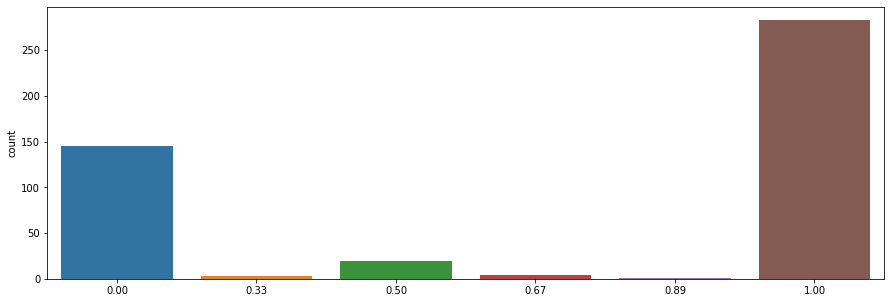

In [315]:
ax = sns.countplot(all_with_list_merged.apply(lambda x: len(set(x.affected_tags_from_szz).intersection(x.version_name_x)) / len(x.version_name_x), axis = 1))
ax.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
plt.show()

**Percentage of Jira versions intersecting the ones from SZZ out of all from SZZ**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


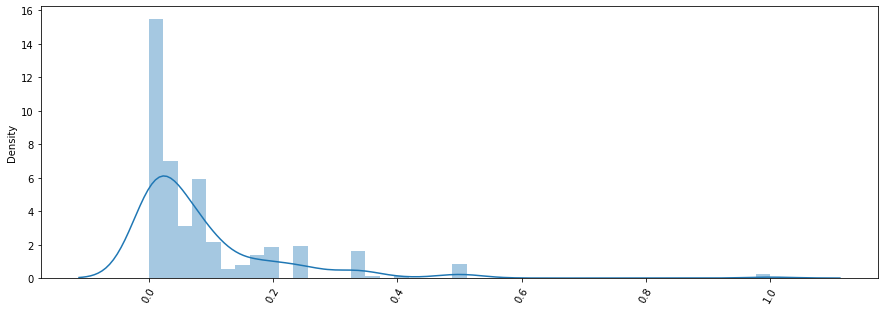

In [316]:
ax = sns.distplot(all_with_list_merged[all_with_list_merged.affected_tags_from_szz.apply(lambda x: len(x) > 0)]\
              .apply(lambda x: len(set(x.version_name_x).intersection(x.affected_tags_from_szz)) \
                     / len(x.affected_tags_from_szz), axis = 1))
ax.tick_params(axis='x', labelrotation= 60)

In [317]:
all_with_list_merged.apply(lambda x: len(x.affected_tags_from_szz) > len(x.version_name_x), axis = 1).value_counts(normalize=True)

True     0.848352
False    0.151648
dtype: float64

**Only issues with multiple versions**

In [319]:
y.apply(lambda x: len(set(x.affected_tags_from_szz).intersection(x.version_name_x)) / len(x.version_name_x), axis=1).value_counts(normalize=True).sort_index()

0.000000    0.1375
0.333333    0.0375
0.500000    0.2375
0.666667    0.0500
0.888889    0.0125
1.000000    0.5250
dtype: float64

Comparing the list of all affected tags from SZZ Unleashed with the ones from Jira, we observed the following:
* Over 68% of all issues have at least half of their affectedVersions from Jira in the ones from SZZ (includes one version issues as well, which we have analysed in depth)
* SZZ detects more tags as affected, than the ones reported on Jira, in 84% of the cases
* If we look only at multiple affected version issues, 75% has half or more of the versions in the SZZ ones
* 64% of the versions for the 1 version issues are in the affected tags from SZZ

## Szz Unleashed - Bug issues with Affected Version - Distance

### Import of the data

In [186]:
working_folder = "szz_with_affected_distance"

In [187]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/fix_and_introducers_pairs_*")
szz_files

['../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_4.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_5.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_2.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_3.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_0.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_1.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_6.json',
 '../../szz/szz_with_affected_distance/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [188]:
data2 = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data2.update(json.load(f))

In [189]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [190]:
tuples = []
for key in data2.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data2[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit_with_affected = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit_with_affected.creationdate = pd.to_datetime(issues_fixing_commit_with_affected.creationdate)
issues_fixing_commit_with_affected

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-7084,2015-11-26 16:37:15+01:00,2016-05-17 16:42:24 +0200,2015-11-30 16:51:26 +0100,f463897daea037addd0ee5d1a45c046b784e1fc5
1,SONAR-7083,2015-11-26 15:22:13+01:00,2015-11-30 14:01:03 +0100,2015-11-30 11:48:51 +0100,06310fbb1aff7750fa55a4eebd6fc8eada97f95a
2,SONAR-9782,2017-09-01 17:05:07+02:00,2017-10-17 11:33:22 +0200,2017-10-16 10:33:00 +0200,87f55940473777bd4080595a8369a7cf958745c4
3,SONAR-11468,2018-11-12 08:43:21+01:00,2018-12-04 16:05:26 +0100,2018-12-04 16:04:32 +0100,4ecd4bdcbc24f97a2d77aafb6273ce805976baaf
4,SONAR-10258,2018-01-08 16:51:50+01:00,2018-01-10 09:05:57 +0100,2018-01-08 17:52:43 +0100,0b8e4aad2693dbea56400bacd43fd8a4aec72389
...,...,...,...,...,...
500,SONAR-6715,2015-07-15 08:29:57+02:00,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
501,SONAR-6831,2015-09-03 12:09:33+02:00,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
502,SONAR-6995,2015-11-04 15:23:53+01:00,2015-12-04 11:30:34 +0100,2015-12-03 12:29:24 +0100,e5f5ca562f10727eead9e0de8fe1a090dea8399d
503,SONAR-6632,2015-06-09 21:51:26+02:00,2016-05-16 14:41:20 +0200,2016-05-16 12:12:25 +0200,23ee784e6d44f8462c8d160c7a113a64424bfb67


### Bug inducing commits

In [191]:
szz_inducing_folders2 = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))
szz_inducing_files2 = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))

In [192]:
fix_and_introducers_pairs_with_affected = {}

for file in szz_inducing_files2:
    with open(file, "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

for folder in szz_inducing_folders2:
    with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

In [193]:
fix_and_introducers_pairs_tuples_with_affected = []
for key in fix_and_introducers_pairs_with_affected.keys():
    fix_and_introducers_pairs_tuples_with_affected.append((key, fix_and_introducers_pairs_with_affected[key]))
fix_and_introducers_with_affected = pd.DataFrame(fix_and_introducers_pairs_tuples_with_affected, columns=["fixing_commit", "inducing_commit"])

In [194]:
fix_and_introducers_with_affected

,fixing_commit,inducing_commit
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c
...,...,...
457,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26
458,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58
459,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063
460,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2


In [195]:
(fix_and_introducers_with_affected.groupby("fixing_commit").inducing_commit.count()>1).sum()

0

fix_and_introducers_with_affected["fixing_tag"] = fix_and_introducers_with_affected.fixing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))
fix_and_introducers_with_affected["inducing_tag"] = fix_and_introducers_with_affected.inducing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))

In [196]:
#fix_and_introducers_with_affected.to_csv(f"{csv_folder}/fix_and_introducers_with_affected_distance.csv")
fix_and_introducers_with_affected = pd.read_csv(f"{csv_folder}/fix_and_introducers_with_affected_distance.csv", index_col=0)
fix_and_introducers_with_affected

,fixing_commit,inducing_commit,fixing_tag,inducing_tag
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,7.5
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c,6.7,6.0
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.5.0.37579,8.4.0.35506
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,7.5,6.1
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.4.0.35506,8.2.0.32929
...,...,...,...,...
457,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26,5.6.2,5.4
458,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,7.5
459,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063,5.2,5.0
460,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2,6.7,6.4


In [197]:
fix_and_introducers_with_affected.isna().sum()

fixing_commit      0
inducing_commit    0
fixing_tag         1
inducing_tag       0
dtype: int64

### Analysis

In [198]:
merge = fix_and_introducers_with_affected.merge(issues_fixing_commit_with_affected, left_on="fixing_commit", right_on="hash")[["issue_name", "inducing_commit", "inducing_tag"]]
merge = merge.merge(issues, left_on="issue_name", right_on="issue_key")[["issue_id", "issue_name", "inducing_commit", "inducing_tag"]]
merge

,issue_id,issue_name,inducing_commit,inducing_tag
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0
2,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506
3,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1
4,94773,SONAR-13460,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.2.0.32929
...,...,...,...,...
450,40624,SONAR-6726,7534b360dac6e9e139bd148613fe6a9930dfffa4,4.5.1
451,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4
452,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5
453,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0


In [199]:
merge2 = merge.merge(versions, on="issue_id")
merge2

,issue_id,issue_name,inducing_commit,inducing_tag,version_name,version_id
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,7.3,14464
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,5.6.3,13420
2,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,6.1,13287
3,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,8.4,15833
4,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,6.7,13972
...,...,...,...,...,...,...
556,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,5.6,12869
557,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,7.2,14213
558,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,4.5.1,11621
559,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,5.0,11625


### Issues with only one version

Issues from the SZZ analysis which only have 1 affecred version on Jira

In [200]:
x = versions.groupby(["issue_id"]).version_name.count()
issues_with_one_version = x[x < 2].index
one_version_issues = merge2[merge2.issue_id.isin(issues_with_one_version)]
len(one_version_issues)

375

In [201]:
one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
one_version_issues["inducing_tag_modif"] = one_version_issues.inducing_tag.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])
one_version_issues["version_name_major"] = one_version_issues.version_name.apply(lambda v: v.split(".")[0])
one_version_issues["version_name_minor"] = one_version_issues.version_name.apply(lambda v: v.split(".")[1])
one_version_issues["version_name_modif"] = one_version_issues.version_name.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])

<ipython-input-201-20fc0d06af86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
<ipython-input-201-20fc0d06af86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
<ipython-input-201-20fc0d06af86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

**Full match**

In [202]:
len(one_version_issues[(one_version_issues.inducing_tag == one_version_issues.version_name).tolist()]) / len(one_version_issues)

0.232

**Partial match: only major version**

In [203]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist()]) / len(one_version_issues)

0.7493333333333333

**Partial match: both major and minor version**

In [204]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist() and \
                   (one_version_issues.inducing_tag_minor == one_version_issues.version_name_minor).tolist()]) / len(one_version_issues)

0.2906666666666667

### Issues with more than 1 version

In [205]:
x_with_list = versions.groupby(["issue_id"]).version_name.apply(list)
x_with_list = x_with_list[x_with_list.index.isin(merge2.issue_id) & x_with_list.apply(lambda x: len(x) > 1)]

In [206]:
y = x_with_list.reset_index().merge(merge2, on="issue_id")
y = y.drop_duplicates(subset='issue_id', keep="last")
y

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,cdf4443c3769ea50c1dc127c10dfb905847568dc,3.6,5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,5.1,11627
5,40452,"[5.1, 5.1.1]",SONAR-6715,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,5.1.1,11628
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,5.1,11627
...,...,...,...,...,...,...,...
177,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,7.9.1,15029
179,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,7.9,14945
181,90155,"[7.9, 8.4]",SONAR-12692,3065f6824c72d504c8e317c7d2d6a2c682081c4f,7.5,8.4,15833
183,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,8.0,14962


In [207]:
len(y[y.apply(lambda x: x.inducing_tag in x.version_name_x, axis = 1)])

16

In [208]:
y[y.apply(lambda x: not x.inducing_tag in x.version_name_x, axis = 1)]

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,cdf4443c3769ea50c1dc127c10dfb905847568dc,3.6,5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,5.1,11627
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,5.1,11627
19,44279,"[4.5.6, 5.2, 5.3]",SONAR-7142,7cf57c2495bd16c2e7056c0ff47fc962a8ff432f,5.1,5.3,11647
...,...,...,...,...,...,...,...
177,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,7.9.1,15029
179,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,7.9,14945
181,90155,"[7.9, 8.4]",SONAR-12692,3065f6824c72d504c8e317c7d2d6a2c682081c4f,7.5,8.4,15833
183,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,8.0,14962


## Szz Unleashed - Bug issues with Affected Version - No test

### Import of the data

In [209]:
working_folder = "szz_un_aff_no_test"

In [210]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/fix_and_introducers_pairs_*")
szz_files

['../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_4.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_5.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_2.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_3.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_0.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_1.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_6.json',
 '../../szz/szz_un_aff_no_test/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [211]:
data2 = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data2.update(json.load(f))

In [212]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [213]:
tuples = []
for key in data2.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data2[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit_with_affected = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit_with_affected.creationdate = pd.to_datetime(issues_fixing_commit_with_affected.creationdate)
issues_fixing_commit_with_affected

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-7084,2015-11-26 16:37:15+01:00,2016-05-17 16:42:24 +0200,2015-11-30 16:51:26 +0100,f463897daea037addd0ee5d1a45c046b784e1fc5
1,SONAR-7083,2015-11-26 15:22:13+01:00,2015-11-30 14:01:03 +0100,2015-11-30 11:48:51 +0100,06310fbb1aff7750fa55a4eebd6fc8eada97f95a
2,SONAR-9782,2017-09-01 17:05:07+02:00,2017-10-17 11:33:22 +0200,2017-10-16 10:33:00 +0200,87f55940473777bd4080595a8369a7cf958745c4
3,SONAR-11468,2018-11-12 08:43:21+01:00,2018-12-04 16:05:26 +0100,2018-12-04 16:04:32 +0100,4ecd4bdcbc24f97a2d77aafb6273ce805976baaf
4,SONAR-10258,2018-01-08 16:51:50+01:00,2018-01-10 09:05:57 +0100,2018-01-08 17:52:43 +0100,0b8e4aad2693dbea56400bacd43fd8a4aec72389
...,...,...,...,...,...
500,SONAR-6715,2015-07-15 08:29:57+02:00,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
501,SONAR-6831,2015-09-03 12:09:33+02:00,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
502,SONAR-6995,2015-11-04 15:23:53+01:00,2015-12-04 11:30:34 +0100,2015-12-03 12:29:24 +0100,e5f5ca562f10727eead9e0de8fe1a090dea8399d
503,SONAR-6632,2015-06-09 21:51:26+02:00,2016-05-16 14:41:20 +0200,2016-05-16 12:12:25 +0200,23ee784e6d44f8462c8d160c7a113a64424bfb67


### Bug inducing commits

In [214]:
szz_inducing_folders2 = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))
szz_inducing_files2 = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))

In [215]:
fix_and_introducers_pairs_with_affected = {}

for file in szz_inducing_files2:
    with open(file, "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

for folder in szz_inducing_folders2:
    with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
        fix_and_introducers_pairs_with_affected.update(json.load(f))

In [216]:
fix_and_introducers_pairs_tuples_with_affected = []
for key in fix_and_introducers_pairs_with_affected.keys():
    fix_and_introducers_pairs_tuples_with_affected.append((key, fix_and_introducers_pairs_with_affected[key]))
fix_and_introducers_with_affected = pd.DataFrame(fix_and_introducers_pairs_tuples_with_affected, columns=["fixing_commit", "inducing_commit"])

In [217]:
fix_and_introducers_with_affected

,fixing_commit,inducing_commit
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c
...,...,...
436,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26
437,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58
438,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063
439,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2


In [218]:
(fix_and_introducers_with_affected.groupby("fixing_commit").inducing_commit.count()>1).sum()

0

fix_and_introducers_with_affected["fixing_tag"] = fix_and_introducers_with_affected.fixing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))
fix_and_introducers_with_affected["inducing_tag"] = fix_and_introducers_with_affected.inducing_commit.apply(lambda sha: find_first_tag_contains_commit(sha))

In [219]:
#fix_and_introducers_with_affected.to_csv(f"{csv_folder}/fix_and_introducers_with_affected_no_test.csv")
fix_and_introducers_with_affected = pd.read_csv(f"{csv_folder}/fix_and_introducers_with_affected_no_test.csv", index_col=0)
fix_and_introducers_with_affected

,fixing_commit,inducing_commit,fixing_tag,inducing_tag
0,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,7.5
1,34fece43c543cd2d3cd8e76a9af188f12cf69c39,d936fa531cecfec3ef352d1132e67edca256512c,6.7,6.0
2,34a0bc1a4e14e13a7d40a410b268d6ea7b0f3a40,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.5.0.37579,8.4.0.35506
3,fecabb60a6737406700e07e274f14cd75af7fba7,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,7.5,6.1
4,62d76a285dc86c756fddeb63a0b073f11ee46f25,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.4.0.35506,8.2.0.32929
...,...,...,...,...
436,014f2053e5360baa98762f163f11e88843eed9a8,f4c7830570b522ad83ec9168cf12755e58192d26,5.6.2,5.4
437,595a86b1947d2e4cdb5f6a083eacd497627b4025,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,7.5
438,59e1f8eca37d7a37e0837e437ab3e6eb38a7dfea,e1c3a706319c397b436a28b7921b695baf712063,5.2,5.0
439,7a230c2fa98532eb79d2efcd30c31d608f9fa108,de4365079bad2df3bdee2133576dc913ffbf1ab2,6.7,6.4


In [220]:
fix_and_introducers_with_affected.isna().sum()

fixing_commit      0
inducing_commit    0
fixing_tag         1
inducing_tag       0
dtype: int64

### Analysis

In [221]:
merge = fix_and_introducers_with_affected.merge(issues_fixing_commit_with_affected, left_on="fixing_commit", right_on="hash")[["issue_name", "inducing_commit", "inducing_tag"]]
merge = merge.merge(issues, left_on="issue_name", right_on="issue_key")[["issue_id", "issue_name", "inducing_commit", "inducing_tag"]]
merge

,issue_id,issue_name,inducing_commit,inducing_tag
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0
2,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506
3,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1
4,94773,SONAR-13460,f91c8fde272864fb938fd7c7c0a1fe3bd01cbb5c,8.2.0.32929
...,...,...,...,...
436,40624,SONAR-6726,7534b360dac6e9e139bd148613fe6a9930dfffa4,4.5.1
437,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4
438,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5
439,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0


In [222]:
merge2 = merge.merge(versions, on="issue_id")
merge2

,issue_id,issue_name,inducing_commit,inducing_tag,version_name,version_id
0,75593,SONAR-11145,5b947f0d78f4a63b916b10e626d29398830e5da3,7.5,7.3,14464
1,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,5.6.3,13420
2,53416,SONAR-8305,d936fa531cecfec3ef352d1132e67edca256512c,6.0,6.1,13287
3,95772,SONAR-13589,357fc23c4d4a930518f6986838aa64f57a8a9a0d,8.4.0.35506,8.4,15833
4,75809,SONAR-11168,6603e70aa5abee4dd7eccf2b0b1c7ad829a028e4,6.1,6.7,13972
...,...,...,...,...,...,...
538,51138,SONAR-7941,f4c7830570b522ad83ec9168cf12755e58192d26,5.4,5.6,12869
539,74006,SONAR-10933,abcce903fa73b67812b7de04a0414f0ea44b0e58,7.5,7.2,14213
540,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,4.5.1,11621
541,42018,SONAR-6847,e1c3a706319c397b436a28b7921b695baf712063,5.0,5.0,11625


### Issues with only one version

Issues from the SZZ analysis which only have 1 affecred version on Jira

In [223]:
x = versions.groupby(["issue_id"]).version_name.count()
issues_with_one_version = x[x < 2].index
one_version_issues = merge2[merge2.issue_id.isin(issues_with_one_version)]
len(one_version_issues)

364

In [224]:
one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
one_version_issues["inducing_tag_modif"] = one_version_issues.inducing_tag.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])
one_version_issues["version_name_major"] = one_version_issues.version_name.apply(lambda v: v.split(".")[0])
one_version_issues["version_name_minor"] = one_version_issues.version_name.apply(lambda v: v.split(".")[1])
one_version_issues["version_name_modif"] = one_version_issues.version_name.apply(lambda v: None if len(v.split("."))<3 else v.split(".")[2])

<ipython-input-224-20fc0d06af86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_major"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[0])
<ipython-input-224-20fc0d06af86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_version_issues["inducing_tag_minor"] = one_version_issues.inducing_tag.apply(lambda v: v.split(".")[1])
<ipython-input-224-20fc0d06af86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

**Full match**

In [225]:
len(one_version_issues[(one_version_issues.inducing_tag == one_version_issues.version_name).tolist()]) / len(one_version_issues)

0.21978021978021978

**Partial match: only major version**

In [226]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist()]) / len(one_version_issues)

0.7472527472527473

**Partial match: both major and minor version**

In [227]:
len(one_version_issues[(one_version_issues.inducing_tag_major == one_version_issues.version_name_major).tolist() and \
                   (one_version_issues.inducing_tag_minor == one_version_issues.version_name_minor).tolist()]) / len(one_version_issues)

0.2802197802197802

### Issues with more than 1 version

In [228]:
x_with_list = versions.groupby(["issue_id"]).version_name.apply(list)
x_with_list = x_with_list[x_with_list.index.isin(merge2.issue_id) & x_with_list.apply(lambda x: len(x) > 1)]

In [229]:
y = x_with_list.reset_index().merge(merge2, on="issue_id")
y = y.drop_duplicates(subset='issue_id', keep="last")
y

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,5.1,11627
5,40452,"[5.1, 5.1.1]",SONAR-6715,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,5.1.1,11628
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,5.1,11627
...,...,...,...,...,...,...,...
170,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,7.9.1,15029
172,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,7.9,14945
174,90155,"[7.9, 8.4]",SONAR-12692,4ff1b9f90fe7b7a695b8059357e97e69419fc36c,7.5,8.4,15833
176,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,8.0,14962


In [230]:
len(y[y.apply(lambda x: x.inducing_tag in x.version_name_x, axis = 1)])

15

In [231]:
y[y.apply(lambda x: not x.inducing_tag in x.version_name_x, axis = 1)]

,issue_id,version_name_x,issue_name,inducing_commit,inducing_tag,version_name_y,version_id
1,29703,"[4.5.4, 5.0]",SONAR-6386,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,5.1,5.0,11625
3,39064,"[5.0, 5.1]",SONAR-6613,11c9d4f6e496041a0dee7b7f637890a51f2a8632,3.7,5.1,11627
7,41022,"[4.5.5, 5.1.2]",SONAR-6781,1df148803610cd54f182b8636f01c0e6ece92b19,5.2,5.1.2,12450
10,41387,"[4.5, 5.0, 5.1]",SONAR-6792,bfeca720d3a702b77664b0164aa02ce89b353cec,4.4,5.1,11627
19,44279,"[4.5.6, 5.2, 5.3]",SONAR-7142,7cf57c2495bd16c2e7056c0ff47fc962a8ff432f,5.1,5.3,11647
...,...,...,...,...,...,...,...
170,88021,"[7.9, 7.9.1]",SONAR-12423,c85249a0cabf07007a3b52253873c6ceaadf9c48,6.6,7.9.1,15029
172,89140,"[7.8, 7.9]",SONAR-12513,3e26c9b9b44ebabbc2c81e134c26799ce3f4bc3b,6.5,7.9,14945
174,90155,"[7.9, 8.4]",SONAR-12692,4ff1b9f90fe7b7a695b8059357e97e69419fc36c,7.5,8.4,15833
176,90568,"[7.9.1, 8.0]",SONAR-12758,ce80f2115245688992a727beeecd46ac43dca703,7.5,8.0,14962
